### Part 4: Momentum Factor *[15 points]*

In this part, you are going to **replicate** the **cross-sectional momentum strategy** from **Kenneth French Data Library**. 

Momentum is defined as:

$\mathrm{MOM}_{i,t} = \prod_{i=2}^{12}(1+r_{i,t-i})$

Suggested structure of the code:
1. Import **'Stock RET.csv'**.
2. Identify **NYSE size cutoffs (50-50 by median)** for each month.
3. Sort stocks into **small stocks (S, bottom 50)** and **big stocks (B, top 50)**.
4. Compute **momentum** $\mathrm{MOM}_{i,t}$ for each stock-month observation *[5 points]*.
5. Identify **NYSE momentum cutoffs (30-40-30 by percentiles)** for each month.
6. Sort stocks into **loser (L, bottom 30), neutral (N, middle 40), and winner stocks (W, top 30)**.
7. Form **2 by 3 portfolios** ($\mathrm{ME} \times \mathrm{MOM}$) through **unconditional bivariate sorts** *[5 points]*.
8. Compute **momentum strategy returns** over time with: $R_{\scriptstyle{\text{WML}}} = \frac{(R_{\scriptstyle{\text{SW}}} +  R_{\scriptstyle{\text{BW}}})}{2} - \frac{(R_{\scriptstyle{\text{SL}}} + R_{\scriptstyle{\text{BL}}})}{2}$ *[2.5 points]*.
9. With the help of a **bar chart**, compare **your replication** with the one constructed by **Fama-French ('F-F_Momentum_Factor')** *[2.5 points]*.

---

## step1: get the Market Equity data

In [90]:
import numpy as np
import pandas as pd

df = pd.read_csv("Stock_RET.csv")
df.date = pd.to_datetime(df.date, format='%Y%m%d', errors='ignore')+ pd.offsets.MonthEnd(0)

df.EXCHCD = pd.to_numeric(df.EXCHCD, errors='coerce')
df.RET = pd.to_numeric(df.RET, errors='coerce')
df.ME = pd.to_numeric(df.ME, errors='coerce')

df = df.set_index(["date", "PERMNO"]) 

In [91]:
df.head()

,,EXCHCD,RET,ME
date,PERMNO,,,
2016-01-31,10001,2,0.116779,87.40160
2016-02-29,10001,2,-0.055288,82.56930
2016-03-31,10001,2,-0.006361,82.06748
2016-04-30,10001,2,-0.055698,76.73760
2016-05-31,10001,2,-0.021918,75.05568


## Step2: specify NYSE stock data

In [92]:
df_nyse = df[df.EXCHCD==1]
df = df.drop(['EXCHCD'], axis=1)

df_nyse = df_nyse.drop(['EXCHCD'], axis=1)
df_nyse.head(3)

,,RET,ME
date,PERMNO,,
2016-01-31,10051,-0.179939,476.07559
2018-09-30,10051,NaN,766.52317
2018-10-31,10051,-0.104177,686.66934


In [93]:
me_nyse = df_nyse.unstack().xs('ME', axis=1)

## Step3: Identify **NYSE size cutoffs (50-50 by median)**

In [94]:
S_cutoff = pd.to_numeric(me_nyse.quantile(.5, axis=1, numeric_only=False)) # medium=0.5

## Step4: Get the market equity portfolio

In [95]:
ME = df.unstack().xs('ME', axis=1)

ME_port = pd.DataFrame(index=ME.index, columns=ME.columns)
ME_port # empty dataframe，等一下儲存 portfolio 用

ME_port[ME.gt(S_cutoff, axis=0)] = 'Big' # gt: greater than
ME_port[ME.le(S_cutoff, axis=0)] = 'Small' # le: less than

ME_port.head()

PERMNO,10001,10025,10026,10028,10032,10044,10051,10104,10107,10116,...,93418,93420,93422,93423,93426,93428,93429,93433,93434,93436
date,,,,,,,,,,,,,,,,,,,,,
2016-01-31,Small,Small,Big,Small,Small,Small,Small,Big,Big,Small,...,Small,Small,Big,Big,Small,Small,Big,Small,Small,Big
2016-02-29,Small,Small,Big,Small,Small,Small,Small,Big,Big,Small,...,Small,Small,Small,Big,Small,Small,Big,Small,Small,Big
2016-03-31,Small,Small,Small,Small,Small,Small,Small,Big,Big,Small,...,Small,Small,Big,Big,Small,Small,Big,Small,Small,Big
2016-04-30,Small,Small,Small,Small,Small,Small,Small,Big,Big,Small,...,Small,Small,Big,Big,Small,Small,Big,Small,Small,Big
2016-05-31,Small,Small,Small,Small,Small,Small,Small,Big,Big,Small,...,Small,Small,Big,Big,Small,Small,Big,Small,Small,Big


## Step5: Calculate momentum

Momentum is defined as:

$\mathrm{MOM}_{i,t} = \prod_{\tau=2}^{12}(1+r_{i,t-\tau})$

In [96]:
df.head()

,,RET,ME
date,PERMNO,,
2016-01-31,10001,0.116779,87.40160
2016-02-29,10001,-0.055288,82.56930
2016-03-31,10001,-0.006361,82.06748
2016-04-30,10001,-0.055698,76.73760
2016-05-31,10001,-0.021918,75.05568


In [97]:
RET = df.unstack().xs('RET', axis=1)
RET = RET.apply(pd.to_numeric)
RET.head(3)

PERMNO,10001,10025,10026,10028,10032,10044,10051,10104,10107,10116,...,93418,93420,93422,93423,93426,93428,93429,93433,93434,93436
date,,,,,,,,,,,,,,,,,,,,,
2016-01-31,0.116779,0.100324,-0.074484,0.212121,0.000859,-0.026977,-0.179939,-0.001916,-0.007030,-0.260000,...,0.077160,-0.274084,-0.043284,-0.085002,0.044170,-0.032523,0.026502,-0.268000,-0.018957,-0.203367
2016-02-29,-0.055288,-0.070061,0.026023,0.500000,0.041202,-0.002868,NaN,0.012944,-0.069886,0.167568,...,0.232092,0.007477,-0.238690,0.023274,-0.008460,0.078340,-0.061843,0.162568,0.012077,0.003818
2016-03-31,-0.006361,-0.161479,-0.019135,-0.183333,0.086013,-0.013579,NaN,0.112289,0.085495,0.310185,...,-0.090698,0.350649,0.445697,0.091034,0.195392,0.093792,0.048960,-0.074031,-0.002387,0.197155


In [98]:
RET.shape

(60, 4923)

In [99]:
import datetime
import dateutil.relativedelta

cal_mom = RET.copy()
cal_mom['NO'] = [i for i in range(cal_mom.shape[0])]
cal_mom.head()

for idx in cal_mom.index:
    no = cal_mom.loc[idx, 'NO']
    if no >= 13:
        res = 1
        for i in range(1, 12):
            prev_mon = idx + dateutil.relativedelta.relativedelta(months=-2-i) + pd.offsets.MonthEnd(0)
            prev_mon_fmt = datetime.datetime.strftime(prev_mon, "%Y-%m-%d")

            if no == 13:
                print(prev_mon_fmt)
                print(cal_mom.loc[prev_mon_fmt, 10104])
            
            res *= (1+cal_mom.loc[prev_mon_fmt, 10104])

        if no == 13:
            print("-------------------")
            print('first momentunm is:', res)

2016-11-30
0.04607
2016-10-31
-0.018075
2016-09-30
-0.047065
2016-08-31
0.004386
2016-07-31
0.006352
2016-06-30
0.018159
2016-05-31
0.00853
2016-04-30
-0.021999
2016-03-31
0.112289
2016-02-29
0.012944
2016-01-31
-0.001916
-------------------
first momentunm is: 1.117292296586686


In [100]:
print(RET.loc[:, 10104].head(13)) # 跟上面的資料一樣
print("first momentum is: ", 0.998084*1.012944*1.112289*0.978001*1.008530*1.018159*1.006352*1.004386*0.952935*0.981925*1.046070)

date
2016-01-31   -0.001916
2016-02-29    0.012944
2016-03-31    0.112289
2016-04-30   -0.021999
2016-05-31    0.008530
2016-06-30    0.018159
2016-07-31    0.006352
2016-08-31    0.004386
2016-09-30   -0.047065
2016-10-31   -0.018075
2016-11-30    0.046070
2016-12-31   -0.043294
2017-01-31    0.047074
Name: 10104, dtype: float64
first momentum is:  1.1172922965866863


In [101]:
import datetime
import dateutil.relativedelta
def cal_mom(df, col_name):
    res_list = []
    cal_mom = df.copy()
    cal_mom['NO'] = [i for i in range(cal_mom.shape[0])]

    for idx in cal_mom.index:
        no = cal_mom.loc[idx, 'NO']
        if no >= 13:
            res = 1
            for i in range(1, 12):
                prev_mon = idx + dateutil.relativedelta.relativedelta(months=-2-i) + pd.offsets.MonthEnd(0)
                prev_mon_fmt = datetime.datetime.strftime(prev_mon, "%Y-%m-%d")
                
                res *= (1+cal_mom.loc[prev_mon_fmt, col_name])
            res_list.append(res)
    return res_list

    

In [102]:
a = cal_mom(RET, 10104)
print(a[0])
len(a) 

1.117292296586686


47

In [103]:
RET.shape # 總共有 60 個月資料

(60, 4923)

In [104]:
RET.head(3)

PERMNO,10001,10025,10026,10028,10032,10044,10051,10104,10107,10116,...,93418,93420,93422,93423,93426,93428,93429,93433,93434,93436
date,,,,,,,,,,,,,,,,,,,,,
2016-01-31,0.116779,0.100324,-0.074484,0.212121,0.000859,-0.026977,-0.179939,-0.001916,-0.007030,-0.260000,...,0.077160,-0.274084,-0.043284,-0.085002,0.044170,-0.032523,0.026502,-0.268000,-0.018957,-0.203367
2016-02-29,-0.055288,-0.070061,0.026023,0.500000,0.041202,-0.002868,NaN,0.012944,-0.069886,0.167568,...,0.232092,0.007477,-0.238690,0.023274,-0.008460,0.078340,-0.061843,0.162568,0.012077,0.003818
2016-03-31,-0.006361,-0.161479,-0.019135,-0.183333,0.086013,-0.013579,NaN,0.112289,0.085495,0.310185,...,-0.090698,0.350649,0.445697,0.091034,0.195392,0.093792,0.048960,-0.074031,-0.002387,0.197155


In [105]:
RET += 1

In [106]:
RET.loc[:, 10104].head(14)

date
2016-01-31    0.998084
2016-02-29    1.012944
2016-03-31    1.112289
2016-04-30    0.978001
2016-05-31    1.008530
2016-06-30    1.018159
2016-07-31    1.006352
2016-08-31    1.004386
2016-09-30    0.952935
2016-10-31    0.981925
2016-11-30    1.046070
2016-12-31    0.956706
2017-01-31    1.047074
2017-02-28    1.061830
Name: 10104, dtype: float64

In [107]:
0.998084*1.012944*1.112289*0.978001*1.008530*1.018159*1.006352*1.004386*0.952935*0.981925*1.046070

1.1172922965866863

In [108]:
1.012944*1.112289*0.978001*1.008530*1.018159*1.006352*1.004386*0.952935*0.981925*1.046070*0.956706

1.0709722266845898

In [109]:
MOM = RET.rolling(11).apply(np.prod).shift(2)

In [110]:
MOM.loc[:, 10104].head(24)

date
2016-01-31         NaN
2016-02-29         NaN
2016-03-31         NaN
2016-04-30         NaN
2016-05-31         NaN
2016-06-30         NaN
2016-07-31         NaN
2016-08-31         NaN
2016-09-30         NaN
2016-10-31         NaN
2016-11-30         NaN
2016-12-31         NaN
2017-01-31    1.117292
2017-02-28    1.070972
2017-03-31    1.107057
2017-04-30    1.056836
2017-05-31    1.131860
2017-06-30    1.135872
2017-07-31    1.126284
2017-08-31    1.236295
2017-09-30    1.230405
2017-10-31    1.301518
2017-11-30    1.273332
2017-12-31    1.286235
Name: 10104, dtype: float64

## Step6: Cutoff and construct portfolio

In [111]:
MOM = MOM.apply(pd.to_numeric)
L_cutoff = pd.to_numeric(MOM.quantile(.3,axis=1,numeric_only=False))
H_cutoff = pd.to_numeric(MOM.quantile(.7,axis=1,numeric_only=False))

In [112]:
WL = df.unstack().xs('ME', axis=1)

WL_port = pd.DataFrame(index=WL.index, columns=WL.columns)
# WL_port # empty dataframe，等一下儲存 portfolio 用

In [113]:
WL_port[MOM.gt(H_cutoff, axis=0)] = 'Winner'
WL_port[(MOM.le(H_cutoff, axis=0)) & (MOM.ge(L_cutoff, axis=0))] = 'Neutral'
WL_port[MOM.lt(L_cutoff, axis=0)] = 'Loser'
WL_port.tail()

PERMNO,10001,10025,10026,10028,10032,10044,10051,10104,10107,10116,...,93418,93420,93422,93423,93426,93428,93429,93433,93434,93436
date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,NaN,NaN,Loser,Winner,Winner,Loser,Neutral,Neutral,Winner,NaN,...,NaN,Loser,Loser,Loser,Loser,NaN,Neutral,NaN,Neutral,Winner
2020-09-30,NaN,NaN,Loser,Winner,Winner,Loser,Neutral,Neutral,Winner,NaN,...,NaN,Loser,Loser,Loser,Neutral,NaN,Neutral,NaN,Neutral,Winner
2020-10-31,NaN,NaN,Loser,Winner,Winner,Loser,Neutral,Neutral,Winner,NaN,...,NaN,Loser,Loser,Loser,Neutral,NaN,Neutral,NaN,Neutral,Winner
2020-11-30,NaN,NaN,Loser,Winner,Neutral,Loser,Loser,Neutral,Winner,NaN,...,NaN,Loser,Loser,Loser,Neutral,NaN,Neutral,NaN,Neutral,Winner
2020-12-31,NaN,NaN,Neutral,Winner,Neutral,Loser,Loser,Neutral,Winner,NaN,...,NaN,NaN,Loser,Loser,Loser,NaN,Loser,NaN,Neutral,Winner


In [114]:
TMP =  ME_port + WL_port
TMP.tail()

PERMNO,10001,10025,10026,10028,10032,10044,10051,10104,10107,10116,...,93418,93420,93422,93423,93426,93428,93429,93433,93434,93436
date,,,,,,,,,,,,,,,,,,,,,
2020-08-31,NaN,NaN,SmallLoser,SmallWinner,SmallWinner,SmallLoser,SmallNeutral,BigNeutral,BigWinner,NaN,...,NaN,SmallLoser,SmallLoser,SmallLoser,SmallLoser,NaN,BigNeutral,NaN,SmallNeutral,BigWinner
2020-09-30,NaN,NaN,SmallLoser,SmallWinner,SmallWinner,SmallLoser,SmallNeutral,BigNeutral,BigWinner,NaN,...,NaN,SmallLoser,SmallLoser,SmallLoser,SmallNeutral,NaN,BigNeutral,NaN,SmallNeutral,BigWinner
2020-10-31,NaN,NaN,SmallLoser,SmallWinner,SmallWinner,SmallLoser,SmallNeutral,BigNeutral,BigWinner,NaN,...,NaN,SmallLoser,SmallLoser,SmallLoser,SmallNeutral,NaN,BigNeutral,NaN,SmallNeutral,BigWinner
2020-11-30,NaN,NaN,SmallLoser,SmallWinner,SmallNeutral,SmallLoser,SmallLoser,BigNeutral,BigWinner,NaN,...,NaN,SmallLoser,SmallLoser,SmallLoser,SmallNeutral,NaN,BigNeutral,NaN,SmallNeutral,BigWinner
2020-12-31,NaN,NaN,SmallNeutral,SmallWinner,SmallNeutral,SmallLoser,SmallLoser,BigNeutral,BigWinner,NaN,...,NaN,NaN,SmallLoser,SmallLoser,SmallLoser,NaN,BigLoser,NaN,SmallNeutral,BigWinner


In [115]:
ME_MOM_port = pd.DataFrame(index=TMP.index).join(TMP)

In [116]:
ME_MOM_port = ME_MOM_port.ffill(axis=0,limit=11).shift(1)

In [117]:
ME_MOM_port.tail(10)

,10001,10025,10026,10028,10032,10044,10051,10104,10107,10116,...,93418,93420,93422,93423,93426,93428,93429,93433,93434,93436
date,,,,,,,,,,,,,,,,,,,,,
2020-03-31,NaN,NaN,BigNeutral,SmallWinner,SmallWinner,SmallNeutral,SmallWinner,BigNeutral,BigWinner,NaN,...,NaN,SmallLoser,SmallLoser,SmallLoser,SmallNeutral,NaN,BigWinner,NaN,SmallNeutral,BigWinner
2020-04-30,NaN,NaN,BigNeutral,SmallWinner,SmallWinner,SmallNeutral,SmallWinner,BigNeutral,BigWinner,NaN,...,NaN,SmallLoser,SmallLoser,SmallLoser,SmallNeutral,NaN,BigWinner,NaN,SmallLoser,BigWinner
2020-05-31,NaN,NaN,BigNeutral,SmallWinner,SmallWinner,SmallNeutral,SmallWinner,BigNeutral,BigWinner,NaN,...,NaN,SmallLoser,SmallLoser,SmallLoser,SmallNeutral,NaN,BigWinner,NaN,SmallWinner,BigWinner
2020-06-30,NaN,NaN,BigNeutral,SmallWinner,SmallWinner,SmallLoser,SmallNeutral,BigWinner,BigWinner,NaN,...,NaN,SmallLoser,SmallLoser,SmallLoser,SmallNeutral,NaN,BigWinner,NaN,SmallNeutral,BigWinner
2020-07-31,NaN,NaN,BigNeutral,SmallWinner,SmallWinner,SmallLoser,SmallNeutral,BigWinner,BigWinner,NaN,...,NaN,SmallLoser,SmallLoser,SmallLoser,SmallLoser,NaN,BigNeutral,NaN,SmallLoser,BigWinner
2020-08-31,NaN,NaN,SmallNeutral,SmallWinner,SmallWinner,SmallLoser,SmallNeutral,BigNeutral,BigWinner,NaN,...,NaN,SmallLoser,SmallLoser,SmallLoser,SmallLoser,NaN,BigWinner,NaN,SmallNeutral,BigWinner
2020-09-30,NaN,NaN,SmallLoser,SmallWinner,SmallWinner,SmallLoser,SmallNeutral,BigNeutral,BigWinner,NaN,...,NaN,SmallLoser,SmallLoser,SmallLoser,SmallLoser,NaN,BigNeutral,NaN,SmallNeutral,BigWinner
2020-10-31,NaN,NaN,SmallLoser,SmallWinner,SmallWinner,SmallLoser,SmallNeutral,BigNeutral,BigWinner,NaN,...,NaN,SmallLoser,SmallLoser,SmallLoser,SmallNeutral,NaN,BigNeutral,NaN,SmallNeutral,BigWinner
2020-11-30,NaN,NaN,SmallLoser,SmallWinner,SmallWinner,SmallLoser,SmallNeutral,BigNeutral,BigWinner,NaN,...,NaN,SmallLoser,SmallLoser,SmallLoser,SmallNeutral,NaN,BigNeutral,NaN,SmallNeutral,BigWinner


## Step7: compute factor

In [118]:
ME_MOM_port.tail(2)

,10001,10025,10026,10028,10032,10044,10051,10104,10107,10116,...,93418,93420,93422,93423,93426,93428,93429,93433,93434,93436
date,,,,,,,,,,,,,,,,,,,,,
2020-11-30,NaN,NaN,SmallLoser,SmallWinner,SmallWinner,SmallLoser,SmallNeutral,BigNeutral,BigWinner,NaN,...,NaN,SmallLoser,SmallLoser,SmallLoser,SmallNeutral,NaN,BigNeutral,NaN,SmallNeutral,BigWinner
2020-12-31,NaN,NaN,SmallLoser,SmallWinner,SmallNeutral,SmallLoser,SmallLoser,BigNeutral,BigWinner,NaN,...,NaN,SmallLoser,SmallLoser,SmallLoser,SmallNeutral,NaN,BigNeutral,NaN,SmallNeutral,BigWinner


In [119]:
ME_lag = df.unstack().xs('ME', axis=1).shift(1) # 現在要開始模擬真實情況了，所以要 lag 一期
unique_port = ['SmallWinner', 'SmallNeutral', 'SmallLoser', 'BigWinner', 'BigNeutral', 'BigLoser']

RET_port = pd.DataFrame(index=RET.index, columns=unique_port)
N_firm = pd.DataFrame(index=RET.index, columns=unique_port)

In [120]:
for p in unique_port:
    TMP_RET = RET[ME_MOM_port==p].apply(pd.to_numeric)
    TMP_ME = ME_lag[ME_MOM_port==p].apply(pd.to_numeric) 

    # do the value-weighted sum (多看幾遍會發現跟上面的 latex 式子一樣!!)
    TMP_PROD = TMP_RET*TMP_ME 
    RET_port[p] = TMP_PROD.sum(axis=1)/TMP_ME.sum(axis=1)
    
    N_firm[p] = TMP_RET.count(axis=1) # axis=1 => 存放每月有多少支股票屬於這個 particular ranking

RET_port = RET_port.dropna()*100 # dropna(): 因為資料最前面的 6 個月沒有 portfolio
RET_port.tail()

,SmallWinner,SmallNeutral,SmallLoser,BigWinner,BigNeutral,BigLoser
date,,,,,,
2020-08-31,102.260680,105.889463,107.375856,109.145568,104.891458,104.929740
2020-09-30,98.787116,95.756887,93.127531,95.514884,98.054813,94.513901
2020-10-31,100.495408,103.695388,103.791164,97.227406,97.436922,99.786795
2020-11-30,118.035217,117.498671,127.531648,110.231313,113.027804,124.497986
2020-12-31,109.072215,108.158687,110.360782,104.266665,104.147290,106.262674


In [121]:
WML = (RET_port.SmallWinner + RET_port.BigWinner)/2 - (RET_port.SmallLoser + RET_port.BigLoser)/2

In [132]:
df_WML = pd.DataFrame(WML, columns=['WMLrep'])
df_WML.tail()

,WMLrep
date,
2020-08-31,-0.449674
2020-09-30,3.330284
2020-10-31,-2.927572
2020-11-30,-11.881552
2020-12-31,-1.642288


## Step8: Compare with dataset

In [124]:
import pandas_datareader as pdr
factor = pdr.get_data_famafrench('F-F_Momentum_Factor', start=df_WML.index.astype(str)[0], end=df_WML.index.astype(str)[-1])
FF = factor[0]
FF.index = df_WML.index

In [125]:
FF.columns

Index(['Mom   '], dtype='object')

In [126]:
FF.rename(columns={'Mom   ':'WML'}, inplace=True)

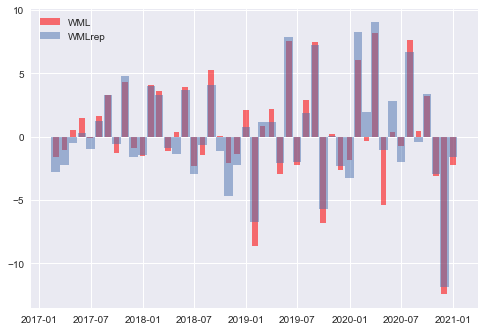

In [127]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

plt.bar(FF.index, FF.WML, width=20, alpha=0.55, color='red')
plt.bar(df_WML.index, df_WML.WMLrep, width=30, alpha=0.5)
plt.legend(['WML','WMLrep'])
plt.show()

In [128]:
FF.join(df_WML).corr()

,WML,WMLrep
WML,1.000000,0.951428
WMLrep,0.951428,1.000000
